In [1]:
#Heart Disease EDA
#Importing all neccesarry libraries here
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Read the CSV file into a DataFrame
df = pd.read_csv('heart_disease_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespaces
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)# Remove special characters

#Now Subsetting neccessary columns for the datset

heartdisease_df = heartdisease_df = df[['physicalhealthdays', 'mentalhealthdays', 'physicalactivities', 'sleephours', 'hadheartattack', 'hadstroke', 'hadasthma', 'hadcopd', 'haddepressivedisorder', 'haddiabetes', 'difficultyconcentrating', 'difficultywalking', 'smokerstatus', 'ecigaretteusage', 'agecategory', 'bmi', 'alcoholdrinkers', 'fluvaxlast12', 'pneumovaxever', 'tetanuslast10tdap']]
heartdisease_df.head()

,physicalhealthdays,mentalhealthdays,physicalactivities,sleephours,hadheartattack,hadstroke,hadasthma,hadcopd,haddepressivedisorder,haddiabetes,difficultyconcentrating,difficultywalking,smokerstatus,ecigaretteusage,agecategory,bmi,alcoholdrinkers,fluvaxlast12,pneumovaxever,tetanuslast10tdap
0,0.0,0.0,No,8.0,No,No,No,No,No,Yes,No,No,Never smoked,Not at all (right now),Age 80 or older,NaN,No,Yes,No,"Yes, received tetanus shot but not sure what type"
1,0.0,0.0,No,6.0,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 80 or older,26.57,No,No,No,"No, did not receive any tetanus shot in the pa..."
2,2.0,3.0,Yes,5.0,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 55 to 59,25.61,No,No,No,NaN
3,0.0,0.0,Yes,7.0,No,No,Yes,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,NaN,23.30,No,Yes,Yes,"No, did not receive any tetanus shot in the pa..."
4,2.0,0.0,Yes,9.0,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 40 to 44,21.77,Yes,No,Yes,"No, did not receive any tetanus shot in the pa..."


Column: tetanuslast10tdap, NA Percentage: 18.54%
Column: pneumovaxever, NA Percentage: 17.31%
Column: bmi, NA Percentage: 10.96%
Column: fluvaxlast12, NA Percentage: 10.59%
Column: alcoholdrinkers, NA Percentage: 10.46%
Column: ecigaretteusage, NA Percentage: 8.01%
Column: smokerstatus, NA Percentage: 7.97%
Column: difficultyconcentrating, NA Percentage: 5.45%
Column: difficultywalking, NA Percentage: 5.39%
Column: physicalhealthdays, NA Percentage: 2.45%
Column: agecategory, NA Percentage: 2.04%
Column: mentalhealthdays, NA Percentage: 2.04%
Column: sleephours, NA Percentage: 1.23%
Column: hadheartattack, NA Percentage: 0.69%
Column: haddepressivedisorder, NA Percentage: 0.63%
Column: hadcopd, NA Percentage: 0.50%
Column: hadasthma, NA Percentage: 0.40%
Column: hadstroke, NA Percentage: 0.35%
Column: physicalactivities, NA Percentage: 0.25%
Column: haddiabetes, NA Percentage: 0.24%
Total number of rows: 445132


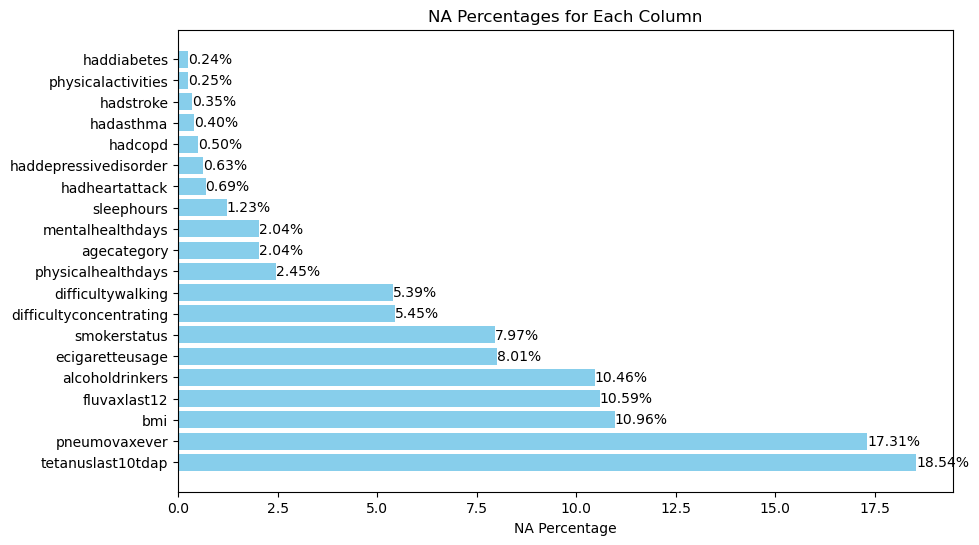

In [2]:
# Calculate and store NA percentages for each column
na_percentages = [(column, (heartdisease_df[column].isna().sum() / len(heartdisease_df)) * 100)
for column in heartdisease_df.columns if (heartdisease_df[column].isna().sum() / len(heartdisease_df)) > 0] #Filtering all NA values greater than zero

# Sort the list of tuples based on NA percentages in descending order
na_percentages.sort(key=lambda x: x[1], reverse=True)

# Display columns and NA percentages in descending order
for column, na_percentage in na_percentages:
    print(f"Column: {column}, NA Percentage: {na_percentage:.2f}%")

# Check total number of rows before cleaning
total_rows_before = len(heartdisease_df)
print("Total number of rows:", total_rows_before)

# Plot a graph with annotations
columns, percentages = zip(*na_percentages)
plt.figure(figsize=(10, 6))
bars = plt.barh(columns, percentages, color='skyblue')
plt.xlabel('NA Percentage')
plt.title('NA Percentages for Each Column')

# Add annotations on the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', ha='left', va='center')

plt.show()

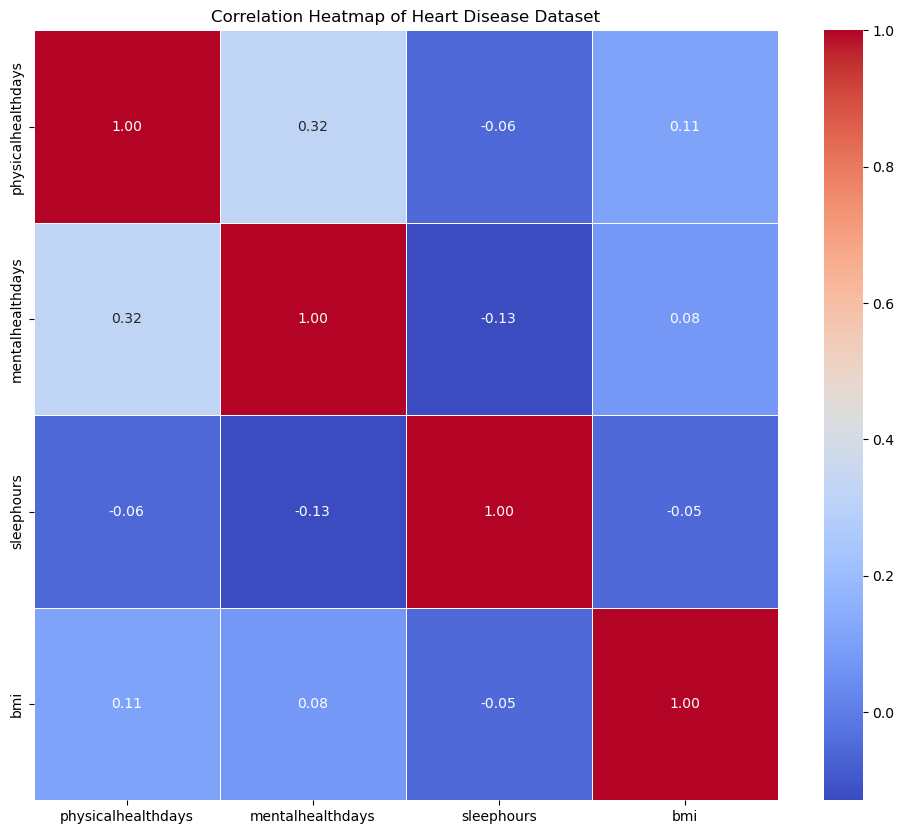

In [3]:
# Calculate the correlation matrix
corr_matrix = heartdisease_df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

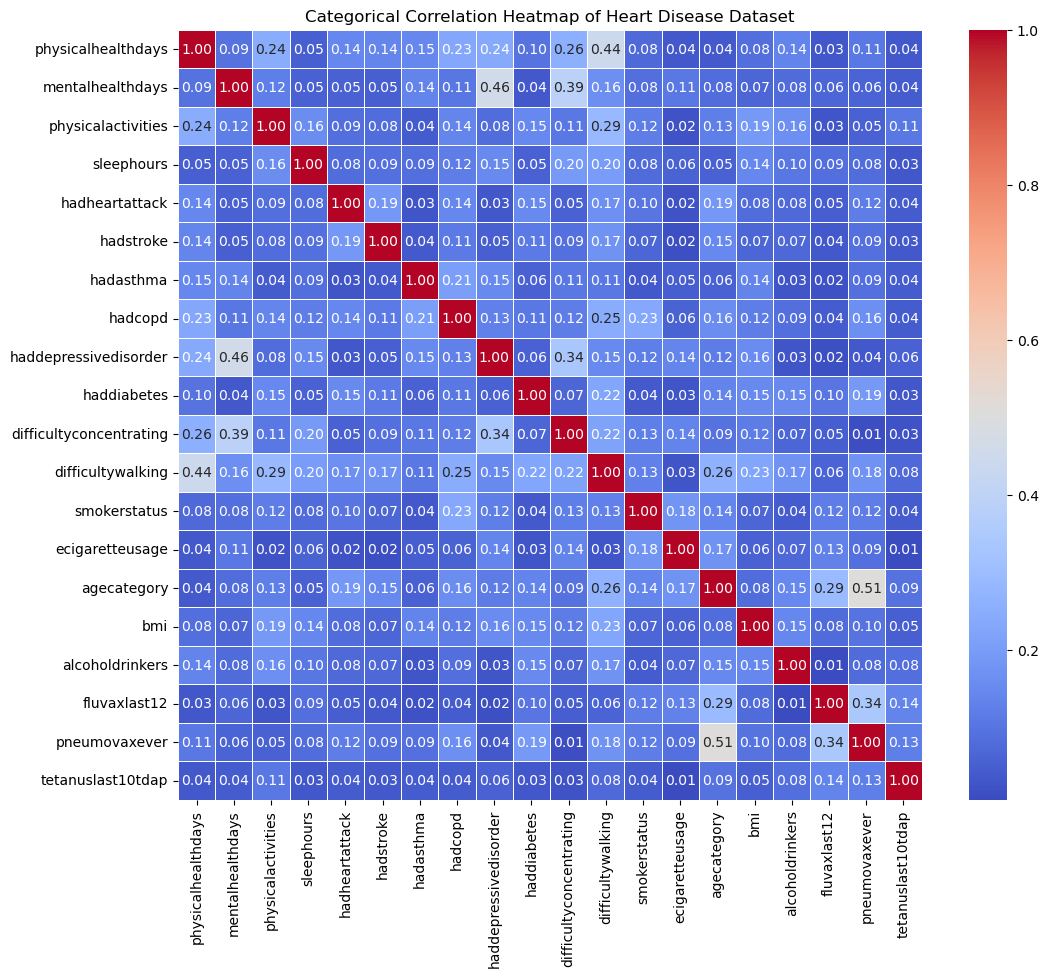

In [4]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def categorical_correlation_matrix(df):
    cols = df.columns
    corr_matrix = np.zeros((len(cols), len(cols)))
    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            corr_matrix[i, j] = cramers_v(df[col1], df[col2])
    return pd.DataFrame(corr_matrix, index=cols, columns=cols)

# Calculate the categorical correlation matrix
categorical_corr_matrix = categorical_correlation_matrix(heartdisease_df)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Categorical Correlation Heatmap of Heart Disease Dataset')
plt.show()

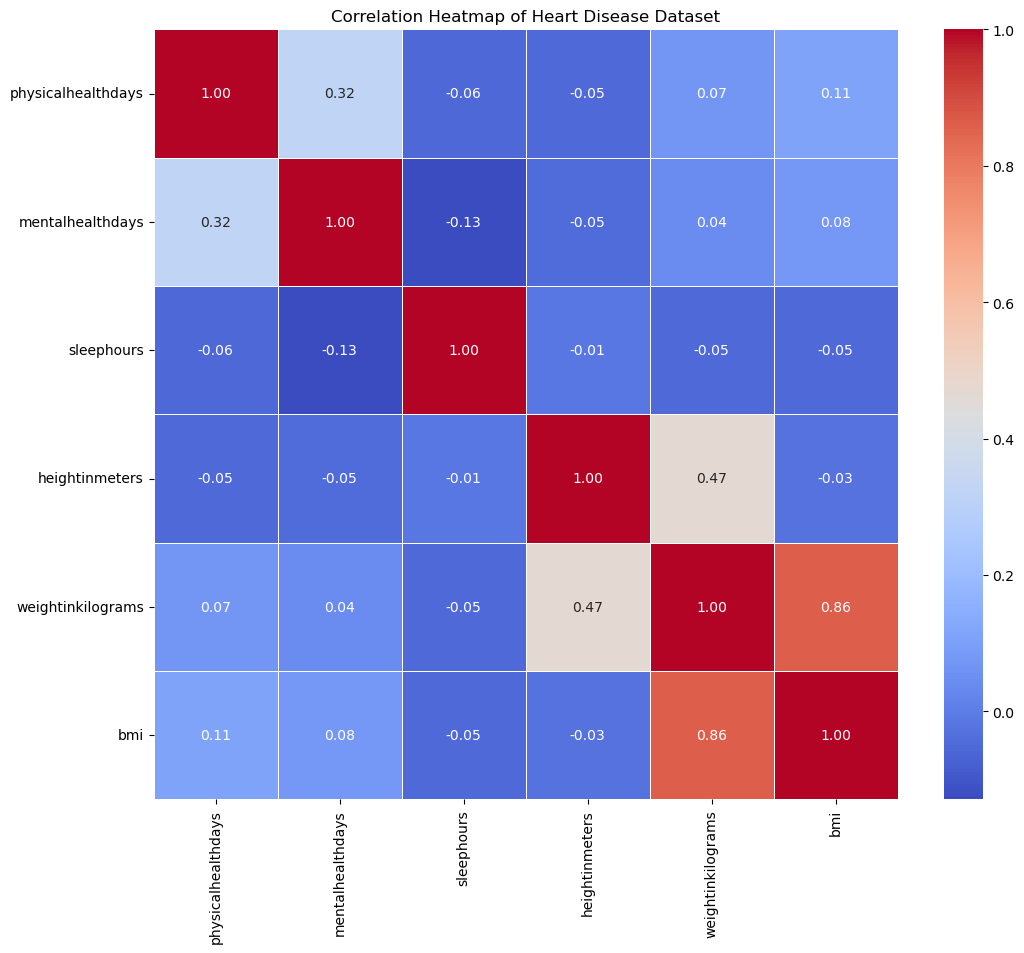

In [5]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

In [6]:
# List of columns with missing values
columns_with_missing_values = ['tetanuslast10tdap', 'pneumovaxever', 'fluvaxlast12']

# Impute missing values with mode
for column in columns_with_missing_values:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    heartdisease_df.loc[:, column] = mode_imputer.fit_transform(heartdisease_df[[column]])

# Check if missing values are imputed
missing_percentage = (heartdisease_df.isnull().sum() / len(heartdisease_df)) * 100
print("Missing value percentages after imputation:")
print(missing_percentage[missing_percentage > 0])

C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\3770322321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df.loc[:, column] = mode_imputer.fit_transform(heartdisease_df[[column]])
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\3770322321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df.loc[:, column] = mode_imputer.fit_transform(heartdisease_df[[column]])
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\3770322321.py:7: SettingWithCopyWarning: 
A value is trying to

Missing value percentages after imputation:
physicalhealthdays          2.454777
mentalhealthdays            2.036924
physicalactivities          0.245545
sleephours                  1.225030
hadheartattack              0.688560
hadstroke                   0.349784
hadasthma                   0.398309
hadcopd                     0.498504
haddepressivedisorder       0.631723
haddiabetes                 0.244197
difficultyconcentrating     5.445576
difficultywalking           5.394355
smokerstatus                7.966626
ecigaretteusage             8.011107
agecategory                 2.039620
bmi                        10.964388
alcoholdrinkers            10.462964
dtype: float64


In [7]:
# Filter out rows with missing 'bmi' values
df_missing_bmi = df[df['bmi'].isnull()]

# Prepare the data for regression
X_train = df.dropna(subset=['bmi', 'weightinkilograms'])[['weightinkilograms']]
y_train = df.dropna(subset=['bmi', 'weightinkilograms'])['bmi']

X_test = df_missing_bmi[['weightinkilograms']]

# Handle missing values in the test set
imputer = SimpleImputer(strategy='median')
X_test_imputed = imputer.fit_transform(X_test)

# Initialize and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict missing 'bmi' values
predicted_bmi = regressor.predict(X_test_imputed)

# Fill missing values in the original DataFrame
df.loc[df['bmi'].isnull(), 'bmi'] = predicted_bmi

heartdisease_df['bmi'] = df['bmi'].copy()

# Check if missing values are imputed
missing_percentage = (heartdisease_df.isnull().sum() / len(heartdisease_df)) * 100
print("Missing value percentages after imputation:")
print(missing_percentage[missing_percentage > 0])

C:\Users\kvsns\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\2413889216.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df['bmi'] = df['bmi'].copy()


Missing value percentages after imputation:
physicalhealthdays          2.454777
mentalhealthdays            2.036924
physicalactivities          0.245545
sleephours                  1.225030
hadheartattack              0.688560
hadstroke                   0.349784
hadasthma                   0.398309
hadcopd                     0.498504
haddepressivedisorder       0.631723
haddiabetes                 0.244197
difficultyconcentrating     5.445576
difficultywalking           5.394355
smokerstatus                7.966626
ecigaretteusage             8.011107
agecategory                 2.039620
alcoholdrinkers            10.462964
dtype: float64


In [8]:
# Specify columns to consider for dropping NA values
columns_to_drop_na = ['hadheartattack', 'haddepressivedisorder', 'hadcopd', 'hadasthma', 'hadstroke', 'physicalactivities', 'haddiabetes']

# Drop rows with NA values in the specified columns
heartdisease_df.dropna(subset=columns_to_drop_na, inplace=True)

# Check the shape of the DataFrame after dropping NA values
print("Shape of DataFrame after dropping NA values:", heartdisease_df.shape)

Shape of DataFrame after dropping NA values: (434190, 20)


C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\3766270084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df.dropna(subset=columns_to_drop_na, inplace=True)


In [9]:
from sklearn.impute import SimpleImputer

# Define SimpleImputer with strategy='most_frequent'
mode_imputer = SimpleImputer(strategy='most_frequent')

# Replace missing values for each column individually
columns_to_impute = ['difficultyconcentrating', 'difficultywalking', 'agecategory', 'mentalhealthdays', 'sleephours', 'physicalhealthdays', 'alcoholdrinkers','ecigaretteusage', 'smokerstatus']
for column in columns_to_impute:
    heartdisease_df[column] = mode_imputer.fit_transform(heartdisease_df[[column]])

# Verify if missing values are imputed
missing_percentage = (heartdisease_df[columns_to_impute].isnull().sum() / len(heartdisease_df)) * 100
print("Missing value percentages after imputation:")
print(missing_percentage)

C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\2865707002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df[column] = mode_imputer.fit_transform(heartdisease_df[[column]])
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\2865707002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df[column] = mode_imputer.fit_transform(heartdisease_df[[column]])
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\2865707002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

Missing value percentages after imputation:
difficultyconcentrating    0.0
difficultywalking          0.0
agecategory                0.0
mentalhealthdays           0.0
sleephours                 0.0
physicalhealthdays         0.0
alcoholdrinkers            0.0
ecigaretteusage            0.0
smokerstatus               0.0
dtype: float64


In [10]:
# Calculate and store NA percentages for each column
na_percentages = [(column, (heartdisease_df[column].isna().sum() / len(heartdisease_df)) * 100)
for column in heartdisease_df.columns if (heartdisease_df[column].isna().sum() / len(heartdisease_df)) > 0] #Filtering all NA values greater than zero

# Sort the list of tuples based on NA percentages in descending order
na_percentages.sort(key=lambda x: x[1], reverse=True)

# Display columns and NA percentages in descending order
for column, na_percentage in na_percentages:
    print(f"Column: {column}, NA Percentage: {na_percentage:.2f}%")

EDA

UNDERSTANDING THE DATA STRUCTURE

In [11]:
# Display basic information about the dataset
heartdisease_df.info()

# Get a statistical summary of numerical columns
print(heartdisease_df.describe())

# Display the first few rows of the dataset
heartdisease_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434190 entries, 0 to 445131
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   physicalhealthdays       434190 non-null  float64
 1   mentalhealthdays         434190 non-null  float64
 2   physicalactivities       434190 non-null  object 
 3   sleephours               434190 non-null  float64
 4   hadheartattack           434190 non-null  object 
 5   hadstroke                434190 non-null  object 
 6   hadasthma                434190 non-null  object 
 7   hadcopd                  434190 non-null  object 
 8   haddepressivedisorder    434190 non-null  object 
 9   haddiabetes              434190 non-null  object 
 10  difficultyconcentrating  434190 non-null  object 
 11  difficultywalking        434190 non-null  object 
 12  smokerstatus             434190 non-null  object 
 13  ecigaretteusage          434190 non-null  object 
 14  agec

,physicalhealthdays,mentalhealthdays,physicalactivities,sleephours,hadheartattack,hadstroke,hadasthma,hadcopd,haddepressivedisorder,haddiabetes,difficultyconcentrating,difficultywalking,smokerstatus,ecigaretteusage,agecategory,bmi,alcoholdrinkers,fluvaxlast12,pneumovaxever,tetanuslast10tdap
0,0.0,0.0,No,8.0,No,No,No,No,No,Yes,No,No,Never smoked,Not at all (right now),Age 80 or older,25.976245,No,Yes,No,"Yes, received tetanus shot but not sure what type"
1,0.0,0.0,No,6.0,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 80 or older,26.570000,No,No,No,"No, did not receive any tetanus shot in the pa..."
2,2.0,3.0,Yes,5.0,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 55 to 59,25.610000,No,No,No,"No, did not receive any tetanus shot in the pa..."
3,0.0,0.0,Yes,7.0,No,No,Yes,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Age 65 to 69,23.300000,No,Yes,Yes,"No, did not receive any tetanus shot in the pa..."
4,2.0,0.0,Yes,9.0,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 40 to 44,21.770000,Yes,No,Yes,"No, did not receive any tetanus shot in the pa..."


UNIVARIATE ANALYSIS

Analyzing individual variables to understand their distribution, range, and central values.


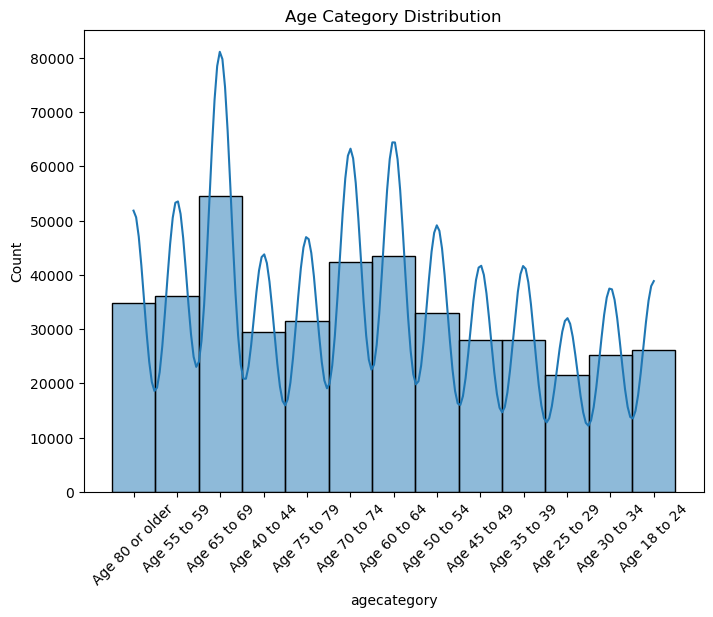

In [12]:
# Histogram of 'agecategory'
plt.figure(figsize=(8, 6))
sns.histplot(heartdisease_df['agecategory'], kde=True, bins=20)
plt.title('Age Category Distribution')
plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and fontsize as needed
plt.show()


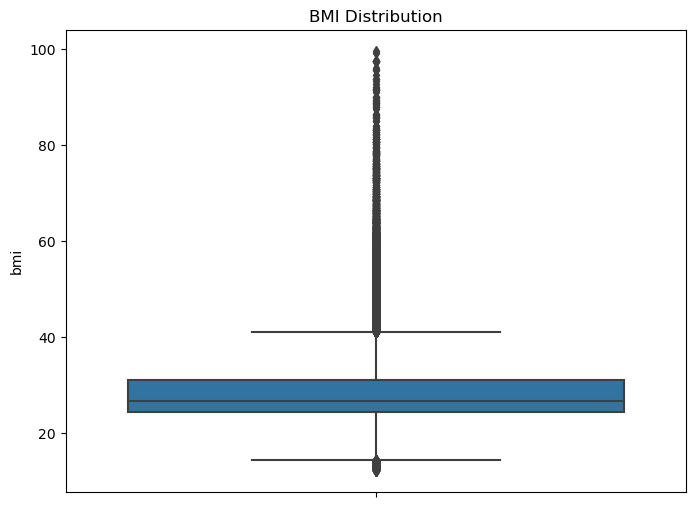

In [13]:
# Boxplot for 'bmi'
plt.figure(figsize=(8, 6))
sns.boxplot(y=heartdisease_df['bmi'])
plt.title('BMI Distribution')
plt.show()

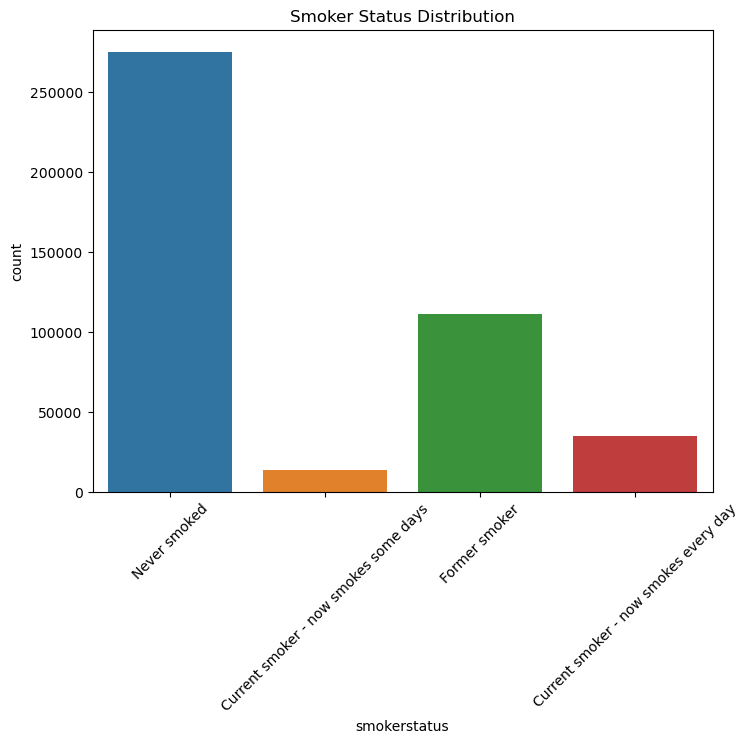

In [14]:
# Count plot for 'smokerstatus'
plt.figure(figsize=(8, 6))
sns.countplot(x='smokerstatus', data=heartdisease_df)
plt.title('Smoker Status Distribution')
plt.xticks(rotation=45, fontsize=10)  # Adjust fontsize to make the x-axis labels smaller
plt.show()


BIVARIATE ANALYSIS

Examining relationships between pairs of variables.

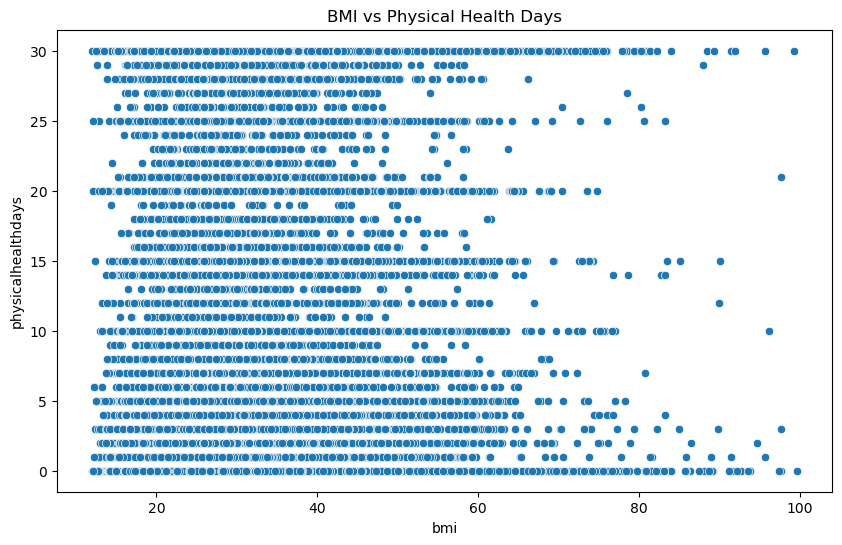

In [15]:
# Scatter plot for 'bmi' vs 'physicalhealthdays'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='physicalhealthdays', data=heartdisease_df)
plt.title('BMI vs Physical Health Days')
plt.show()

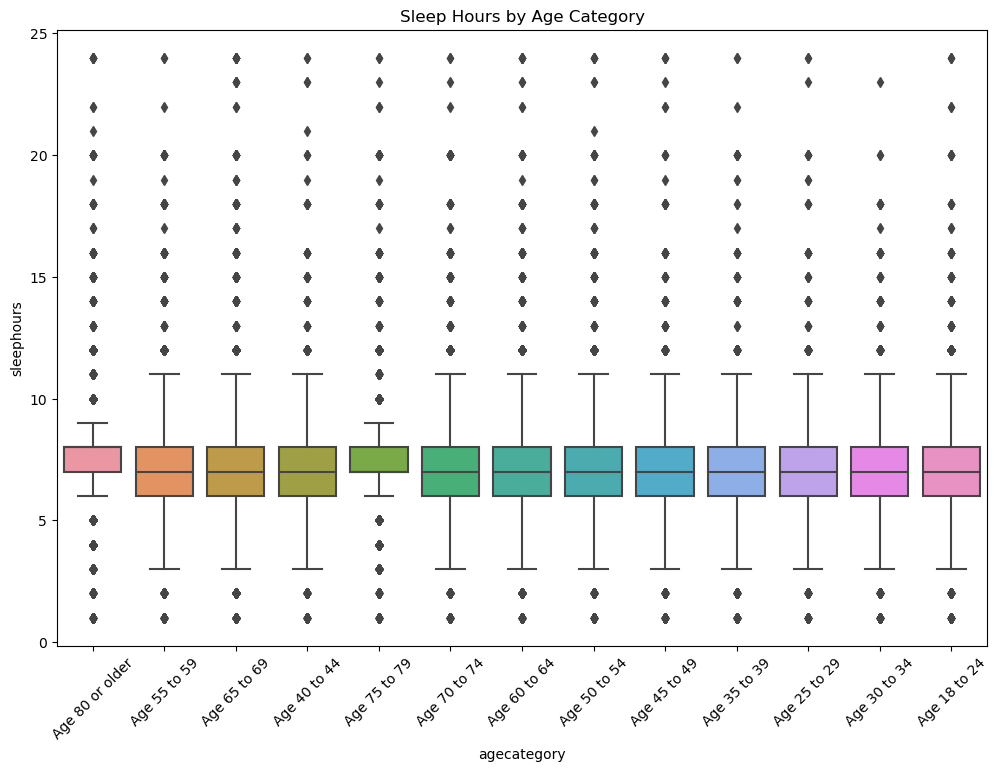

In [16]:
# Boxplot for 'agecategory' vs 'sleephours'
plt.figure(figsize=(12, 8))
sns.boxplot(x='agecategory', y='sleephours', data=heartdisease_df)
plt.title('Sleep Hours by Age Category')
plt.xticks(rotation=45)
plt.show()

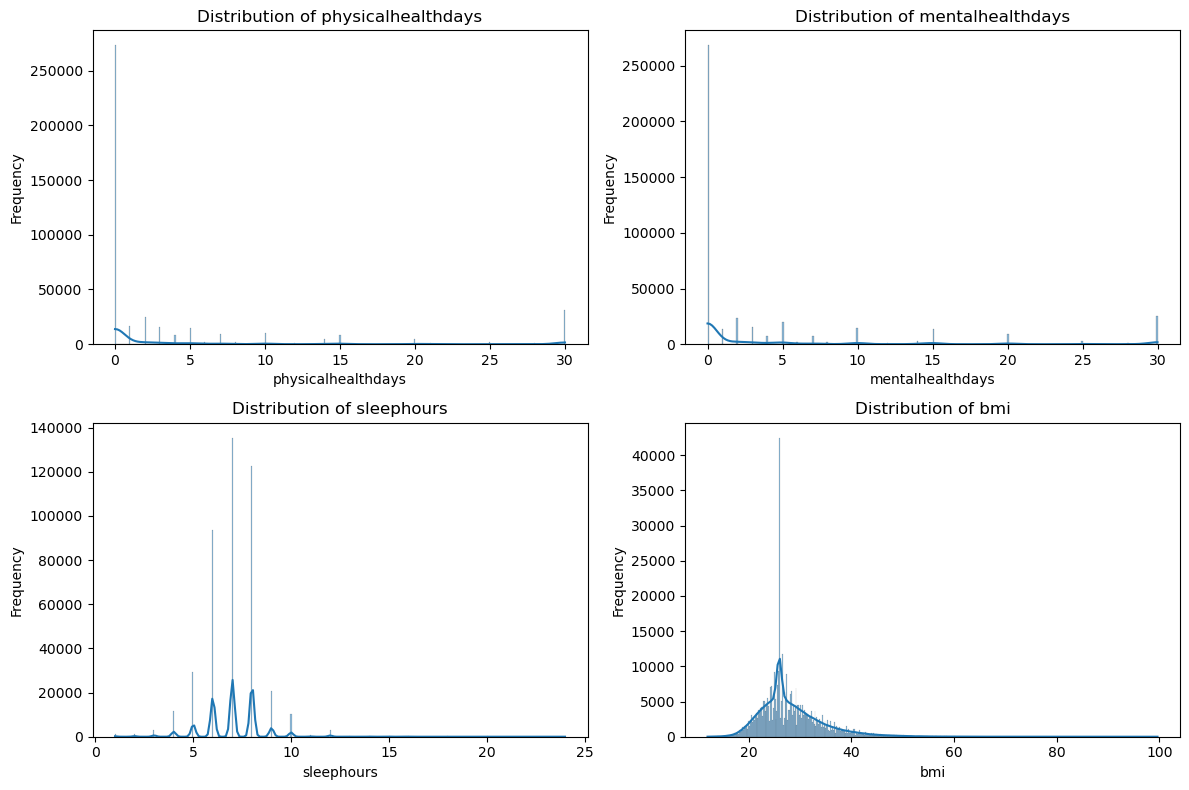

In [17]:
# Distribution visualization
plt.figure(figsize=(12, 8))
for i, column in enumerate(['physicalhealthdays', 'mentalhealthdays', 'sleephours', 'bmi']):
    plt.subplot(2, 2, i+1)
    sns.histplot(heartdisease_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

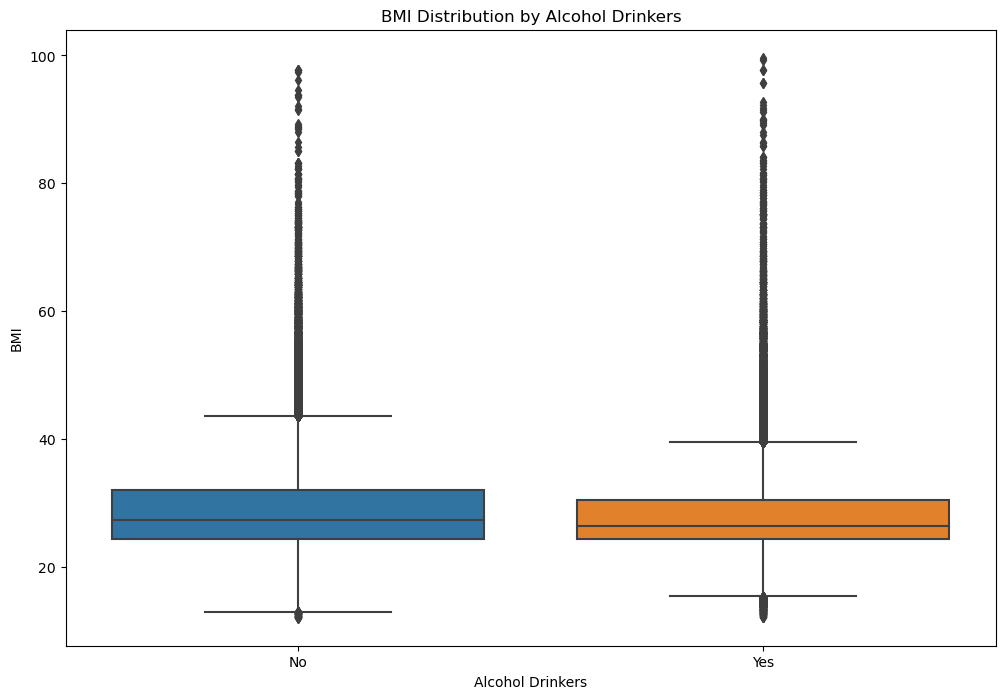

In [18]:
# Relationships between variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='alcoholdrinkers', y='bmi', data=heartdisease_df)
plt.title('BMI Distribution by Alcohol Drinkers')
plt.xlabel('Alcohol Drinkers')
plt.ylabel('BMI')
plt.show()

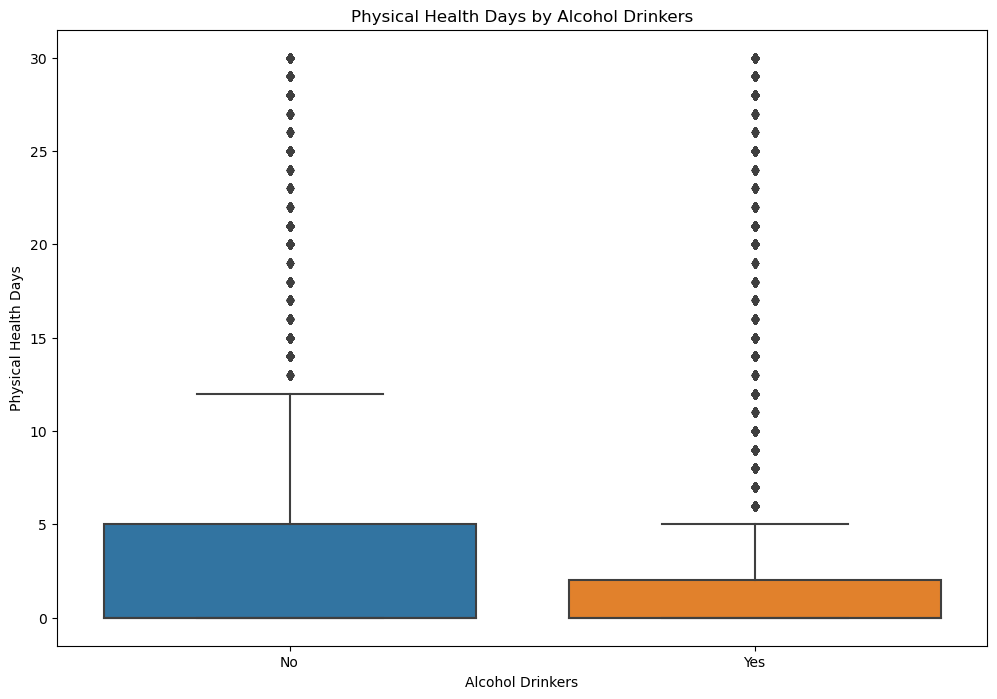

In [19]:
# Relationships between numerical and categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='alcoholdrinkers', y='physicalhealthdays', data=heartdisease_df)
plt.title('Physical Health Days by Alcohol Drinkers')
plt.xlabel('Alcohol Drinkers')
plt.ylabel('Physical Health Days')
plt.show()

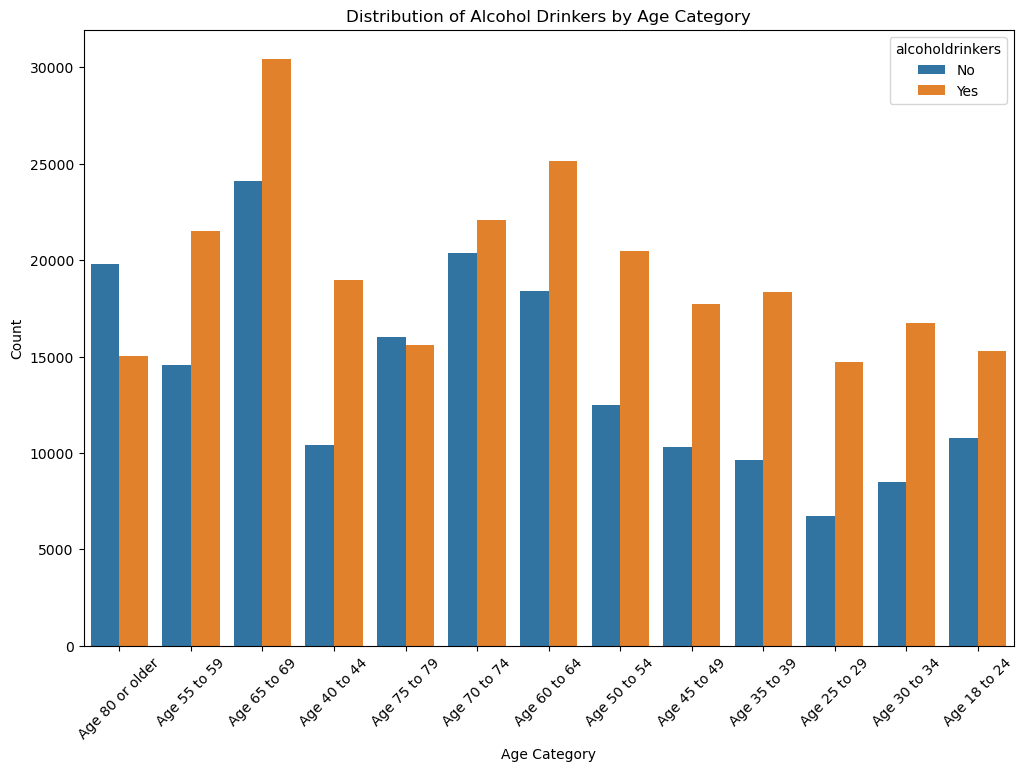

In [20]:
# Visualizing categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='agecategory', data=heartdisease_df, hue='alcoholdrinkers')
plt.title('Distribution of Alcohol Drinkers by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

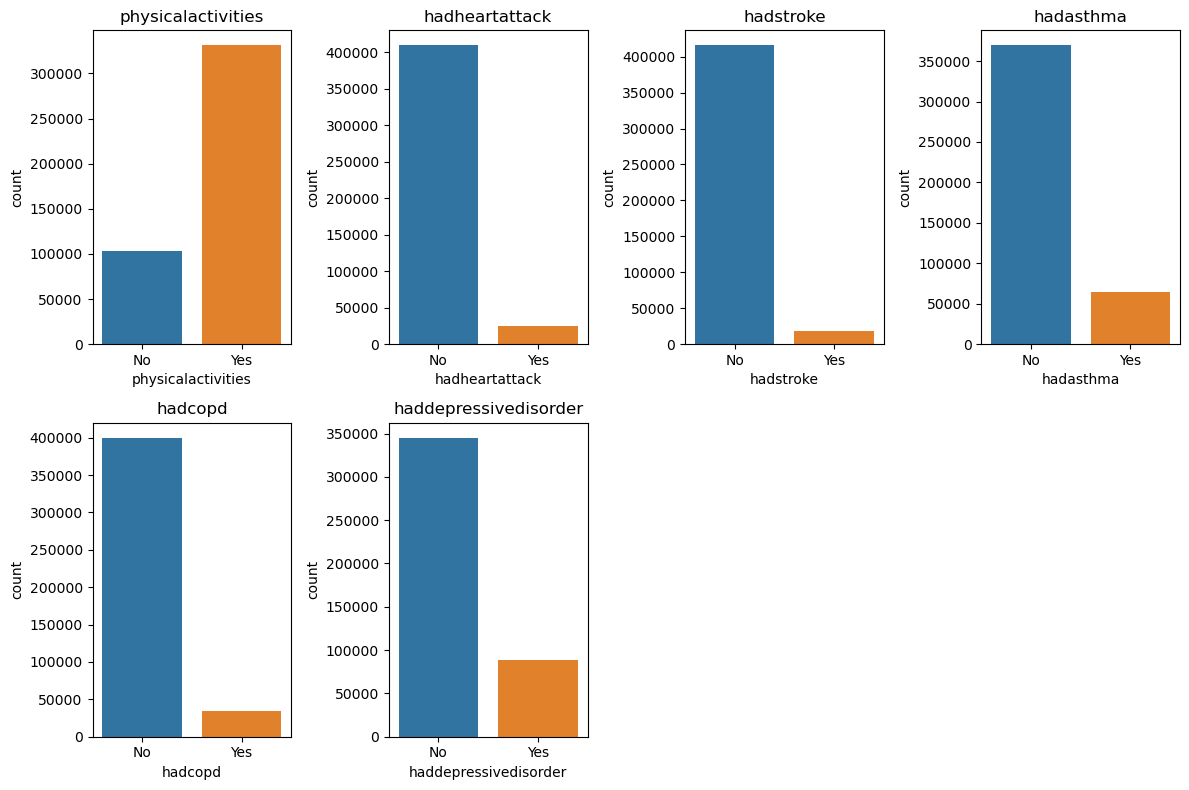

In [21]:
# Count plot for categorical columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(['physicalactivities', 'hadheartattack', 'hadstroke', 'hadasthma', 'hadcopd', 'haddepressivedisorder'], start=1):
    plt.subplot(2, 4, i)
    sns.countplot(x=column, data=heartdisease_df)
    plt.title(column)
plt.tight_layout()
plt.show()

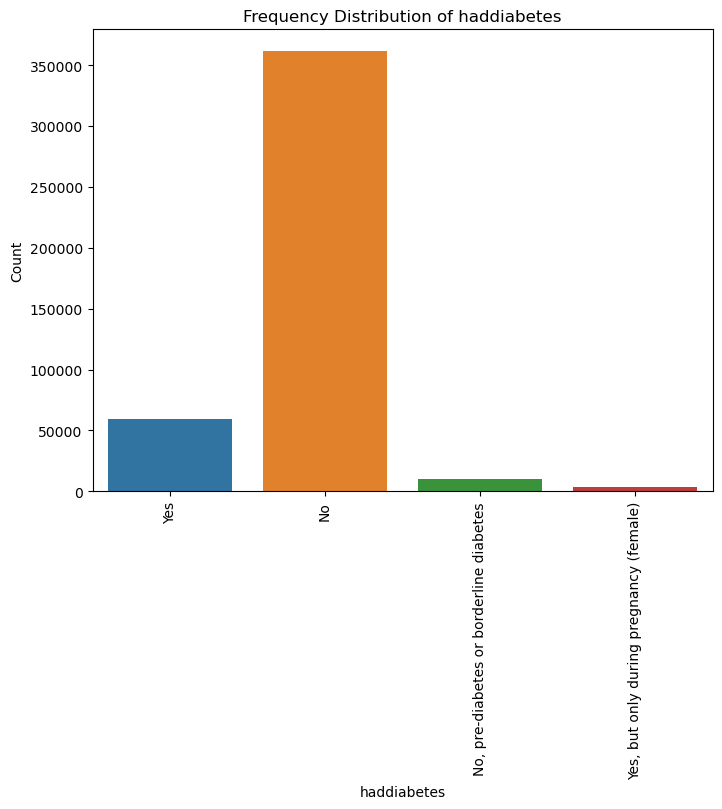

In [22]:
# Count plot for the 'haddiabetes' column
plt.figure(figsize=(8, 6))
sns.countplot(x='haddiabetes', data=heartdisease_df)
plt.title('Frequency Distribution of haddiabetes')
plt.xlabel('haddiabetes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Combine smokerstatus and ecigaretteusage into a single feature
heartdisease_df['smoking_status'] = heartdisease_df['smokerstatus'] + '_' + heartdisease_df['ecigaretteusage']

# Drop the original smokerstatus and ecigaretteusage columns
heartdisease_df.drop(['smokerstatus', 'ecigaretteusage'], axis=1, inplace=True)

# Verify the DataFrame after feature engineering
print(heartdisease_df.head())

   physicalhealthdays  mentalhealthdays physicalactivities  sleephours  \
0                 0.0               0.0                 No         8.0   
1                 0.0               0.0                 No         6.0   
2                 2.0               3.0                Yes         5.0   
3                 0.0               0.0                Yes         7.0   
4                 2.0               0.0                Yes         9.0   

  hadheartattack hadstroke hadasthma hadcopd haddepressivedisorder  \
0             No        No        No      No                    No   
1             No        No        No      No                    No   
2             No        No        No      No                    No   
3             No        No       Yes      No                    No   
4             No        No        No      No                    No   

  haddiabetes difficultyconcentrating difficultywalking      agecategory  \
0         Yes                      No                No  A

C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\1567357480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df['smoking_status'] = heartdisease_df['smokerstatus'] + '_' + heartdisease_df['ecigaretteusage']
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\1567357480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df.drop(['smokerstatus', 'ecigaretteusage'], axis=1, inplace=True)


In [24]:
# Combine fluvaxlast12, pneumovaxever, and tetanuslast10tdap into a single feature
heartdisease_df['vaccination_status'] = heartdisease_df['fluvaxlast12'] + '_' + heartdisease_df['pneumovaxever'] + '_' + heartdisease_df['tetanuslast10tdap']

# Drop the original fluvaxlast12, pneumovaxever, and tetanuslast10tdap columns
heartdisease_df.drop(['fluvaxlast12', 'pneumovaxever', 'tetanuslast10tdap'], axis=1, inplace=True)

# Verify the DataFrame after feature engineering
print(heartdisease_df.head())

   physicalhealthdays  mentalhealthdays physicalactivities  sleephours  \
0                 0.0               0.0                 No         8.0   
1                 0.0               0.0                 No         6.0   
2                 2.0               3.0                Yes         5.0   
3                 0.0               0.0                Yes         7.0   
4                 2.0               0.0                Yes         9.0   

  hadheartattack hadstroke hadasthma hadcopd haddepressivedisorder  \
0             No        No        No      No                    No   
1             No        No        No      No                    No   
2             No        No        No      No                    No   
3             No        No       Yes      No                    No   
4             No        No        No      No                    No   

  haddiabetes difficultyconcentrating difficultywalking      agecategory  \
0         Yes                      No                No  A

C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\2993834523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df['vaccination_status'] = heartdisease_df['fluvaxlast12'] + '_' + heartdisease_df['pneumovaxever'] + '_' + heartdisease_df['tetanuslast10tdap']
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\2993834523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df.drop(['fluvaxlast12', 'pneumovaxever', 'tetanuslast10tdap'], axis=1, inplace=True)


In [25]:
# Convert float columns to integers
float_columns = ['physicalhealthdays', 'mentalhealthdays', 'sleephours', 'bmi']
heartdisease_df[float_columns] = heartdisease_df[float_columns].astype(int)

# Verify the DataFrame after conversion
heartdisease_df.info()

C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\1827628190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df[float_columns] = heartdisease_df[float_columns].astype(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 434190 entries, 0 to 445131
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   physicalhealthdays       434190 non-null  int32 
 1   mentalhealthdays         434190 non-null  int32 
 2   physicalactivities       434190 non-null  object
 3   sleephours               434190 non-null  int32 
 4   hadheartattack           434190 non-null  object
 5   hadstroke                434190 non-null  object
 6   hadasthma                434190 non-null  object
 7   hadcopd                  434190 non-null  object
 8   haddepressivedisorder    434190 non-null  object
 9   haddiabetes              434190 non-null  object
 10  difficultyconcentrating  434190 non-null  object
 11  difficultywalking        434190 non-null  object
 12  agecategory              434190 non-null  object
 13  bmi                      434190 non-null  int32 
 14  alcoholdrinkers     

In [26]:
heartdisease_df.head(5)

,physicalhealthdays,mentalhealthdays,physicalactivities,sleephours,hadheartattack,hadstroke,hadasthma,hadcopd,haddepressivedisorder,haddiabetes,difficultyconcentrating,difficultywalking,agecategory,bmi,alcoholdrinkers,smoking_status,vaccination_status
0,0,0,No,8,No,No,No,No,No,Yes,No,No,Age 80 or older,25,No,Never smoked_Not at all (right now),"Yes_No_Yes, received tetanus shot but not sure..."
1,0,0,No,6,No,No,No,No,No,No,No,No,Age 80 or older,26,No,Never smoked_Never used e-cigarettes in my ent...,"No_No_No, did not receive any tetanus shot in ..."
2,2,3,Yes,5,No,No,No,No,No,No,No,No,Age 55 to 59,25,No,Never smoked_Never used e-cigarettes in my ent...,"No_No_No, did not receive any tetanus shot in ..."
3,0,0,Yes,7,No,No,Yes,No,No,No,No,No,Age 65 to 69,23,No,Current smoker - now smokes some days_Never us...,"Yes_Yes_No, did not receive any tetanus shot i..."
4,2,0,Yes,9,No,No,No,No,No,No,No,No,Age 40 to 44,21,Yes,Never smoked_Never used e-cigarettes in my ent...,"No_Yes_No, did not receive any tetanus shot in..."


Build Random Forest classifier Model

In [27]:
# Identify categorical variables
categorical_cols = heartdisease_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['physicalactivities', 'hadheartattack', 'hadstroke', 'hadasthma', 'hadcopd', 'haddepressivedisorder', 'haddiabetes', 'difficultyconcentrating', 'difficultywalking', 'agecategory', 'alcoholdrinkers', 'smoking_status', 'vaccination_status']


In [28]:
# Find unique values in each categorical column
for col in categorical_cols:
    unique_values = heartdisease_df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in physicalactivities: ['No' 'Yes']
Unique values in hadheartattack: ['No' 'Yes']
Unique values in hadstroke: ['No' 'Yes']
Unique values in hadasthma: ['No' 'Yes']
Unique values in hadcopd: ['No' 'Yes']
Unique values in haddepressivedisorder: ['No' 'Yes']
Unique values in haddiabetes: ['Yes' 'No' 'No, pre-diabetes or borderline diabetes'
 'Yes, but only during pregnancy (female)']
Unique values in difficultyconcentrating: ['No' 'Yes']
Unique values in difficultywalking: ['No' 'Yes']
Unique values in agecategory: ['Age 80 or older' 'Age 55 to 59' 'Age 65 to 69' 'Age 40 to 44'
 'Age 75 to 79' 'Age 70 to 74' 'Age 60 to 64' 'Age 50 to 54'
 'Age 45 to 49' 'Age 35 to 39' 'Age 25 to 29' 'Age 30 to 34'
 'Age 18 to 24']
Unique values in alcoholdrinkers: ['No' 'Yes']
Unique values in smoking_status: ['Never smoked_Not at all (right now)'
 'Never smoked_Never used e-cigarettes in my entire life'
 'Current smoker - now smokes some days_Never used e-cigarettes in my entire life'
 'For

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
binary_cols = ['physicalactivities', 'hadheartattack', 'hadstroke', 'hadasthma', 
               'hadcopd', 'haddepressivedisorder', 'difficultyconcentrating', 
               'difficultywalking', 'alcoholdrinkers']

# Encode binary columns
for col in binary_cols:
    heartdisease_df[col] = label_encoder.fit_transform(heartdisease_df[col])

# Display unique values after encoding
for col in binary_cols:
    print("Unique values in", col + ":", heartdisease_df[col].unique())

C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\4017064851.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df[col] = label_encoder.fit_transform(heartdisease_df[col])
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\4017064851.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df[col] = label_encoder.fit_transform(heartdisease_df[col])
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\4017064851.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Unique values in physicalactivities: [0 1]
Unique values in hadheartattack: [0 1]
Unique values in hadstroke: [0 1]
Unique values in hadasthma: [0 1]
Unique values in hadcopd: [0 1]
Unique values in haddepressivedisorder: [0 1]
Unique values in difficultyconcentrating: [0 1]
Unique values in difficultywalking: [0 1]
Unique values in alcoholdrinkers: [0 1]


C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\4017064851.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df[col] = label_encoder.fit_transform(heartdisease_df[col])
C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\4017064851.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df[col] = label_encoder.fit_transform(heartdisease_df[col])


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Map unique values in haddiabetes to binary values (1 for 'Yes', 0 for others)
heartdisease_df['had_diabetes'] = label_encoder.fit_transform(heartdisease_df['haddiabetes'].apply(lambda x: 'Yes' if x.startswith('Yes') else 'No'))

# Check unique values in the new binary variable
print("Unique values in has_diabetes:", heartdisease_df['had_diabetes'].unique())
heartdisease_df

Unique values in has_diabetes: [1 0]


C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\3268793722.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df['had_diabetes'] = label_encoder.fit_transform(heartdisease_df['haddiabetes'].apply(lambda x: 'Yes' if x.startswith('Yes') else 'No'))


,physicalhealthdays,mentalhealthdays,physicalactivities,sleephours,hadheartattack,hadstroke,hadasthma,hadcopd,haddepressivedisorder,haddiabetes,difficultyconcentrating,difficultywalking,agecategory,bmi,alcoholdrinkers,smoking_status,vaccination_status,had_diabetes
0,0,0,0,8,0,0,0,0,0,Yes,0,0,Age 80 or older,25,0,Never smoked_Not at all (right now),"Yes_No_Yes, received tetanus shot but not sure...",1
1,0,0,0,6,0,0,0,0,0,No,0,0,Age 80 or older,26,0,Never smoked_Never used e-cigarettes in my ent...,"No_No_No, did not receive any tetanus shot in ...",0
2,2,3,1,5,0,0,0,0,0,No,0,0,Age 55 to 59,25,0,Never smoked_Never used e-cigarettes in my ent...,"No_No_No, did not receive any tetanus shot in ...",0
3,0,0,1,7,0,0,1,0,0,No,0,0,Age 65 to 69,23,0,Current smoker - now smokes some days_Never us...,"Yes_Yes_No, did not receive any tetanus shot i...",0
4,2,0,1,9,0,0,0,0,0,No,0,0,Age 40 to 44,21,1,Never smoked_Never used e-cigarettes in my ent...,"No_Yes_No, did not receive any tetanus shot in...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,3,1,6,0,0,1,0,1,No,0,0,Age 18 to 24,25,1,Never smoked_Never used e-cigarettes in my ent...,"No_No_No, did not receive any tetanus shot in ...",0
445128,2,2,1,7,0,0,0,0,0,No,0,0,Age 50 to 54,28,0,Never smoked_Never used e-cigarettes in my ent...,"Yes_No_Yes, received tetanus shot but not sure...",0
445129,30,30,0,5,0,0,0,0,0,No,0,0,Age 65 to 69,17,1,Current smoker - now smokes every day_Use them...,"No_No_No, did not receive any tetanus shot in ...",0
445130,0,0,0,5,1,0,1,0,0,No,0,0,Age 70 to 74,32,0,Never smoked_Never used e-cigarettes in my ent...,"Yes_Yes_No, did not receive any tetanus shot i...",0


In [31]:
# Drop the 'haddiabetes' column
heartdisease_df.drop(columns=['haddiabetes'], inplace=True)

# Check the DataFrame to confirm the column has been dropped
print(heartdisease_df.head())

   physicalhealthdays  mentalhealthdays  physicalactivities  sleephours  \
0                   0                 0                   0           8   
1                   0                 0                   0           6   
2                   2                 3                   1           5   
3                   0                 0                   1           7   
4                   2                 0                   1           9   

   hadheartattack  hadstroke  hadasthma  hadcopd  haddepressivedisorder  \
0               0          0          0        0                      0   
1               0          0          0        0                      0   
2               0          0          0        0                      0   
3               0          0          1        0                      0   
4               0          0          0        0                      0   

   difficultyconcentrating  difficultywalking      agecategory  bmi  \
0                        0 

C:\Users\kvsns\AppData\Local\Temp\ipykernel_30380\1673765471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartdisease_df.drop(columns=['haddiabetes'], inplace=True)


In [32]:
# Perform one-hot encoding for agecategory
age_category_encoded = pd.get_dummies(heartdisease_df['agecategory'], prefix='age')

# Concatenate the encoded age categories with the original DataFrame
heartdisease_df_encoded = pd.concat([heartdisease_df, age_category_encoded], axis=1)

# Drop the original agecategory column since it's no longer needed
heartdisease_df_encoded.drop(columns=['agecategory'], inplace=True)

In [33]:
heartdisease_df_encoded

,physicalhealthdays,mentalhealthdays,physicalactivities,sleephours,hadheartattack,hadstroke,hadasthma,hadcopd,haddepressivedisorder,difficultyconcentrating,...,age_Age 35 to 39,age_Age 40 to 44,age_Age 45 to 49,age_Age 50 to 54,age_Age 55 to 59,age_Age 60 to 64,age_Age 65 to 69,age_Age 70 to 74,age_Age 75 to 79,age_Age 80 or older
0,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,3,1,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,1,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,3,1,6,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
445128,2,2,1,7,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
445129,30,30,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
445130,0,0,0,5,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Find unique values in each column of the DataFrame
for column in heartdisease_df_encoded.columns:
    unique_values = heartdisease_df_encoded[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in physicalhealthdays: [ 0  2  1  8  5 30  4 23 14 15  3 10  7 25  6 21 20 29 16  9 27 28 12 13
 11 26 17 24 19 18 22]
Unique values in mentalhealthdays: [ 0  3  9  5 15 20 14 10 18  1  2 30  4  6  7 25  8 22 29 27 21 12 28 16
 13 26 17 11 23 24 19]
Unique values in physicalactivities: [0 1]
Unique values in sleephours: [ 8  6  5  7  9  4 10  1 12 18  3  2 11 16 15 13 14 20 23 17 24 22 19 21]
Unique values in hadheartattack: [0 1]
Unique values in hadstroke: [0 1]
Unique values in hadasthma: [0 1]
Unique values in hadcopd: [0 1]
Unique values in haddepressivedisorder: [0 1]
Unique values in difficultyconcentrating: [0 1]
Unique values in difficultywalking: [0 1]
Unique values in bmi: [25 26 23 21 22 27 29 28 32 24 19 44 37 31 39 34 33 35 38 45 13 41 30 36
 20 17 56 47 42 51 16 43 18 40 46 49 50 55 58 15 48 54 57 91 14 60 53 52
 61 59 76 12 68 63 65 62 78 64 72 75 69 70 74 85 71 67 94 66 88 73 92 97
 80 77 81 95 99 79 86 83 96 82 90 89 87 84 93]
Unique values in alcoholdri

In [35]:
# List of unique vaccination statuses
unique_statuses = [
    'received tetanus shot but not sure what type',
    'did not receive any tetanus shot in the past 10 years',
    'received Tdap'
    'received tetanus shot, but not Tdap'
]

# Feature engineer vaccination status with shorter column names
for status in unique_statuses:
    # Extract the vaccination status abbreviation
    status_abbr = status.split()[1].lower()
    # Create a new binary column for the current vaccination status with a shorter name
    column_name = 'received_' + status_abbr
    heartdisease_df_encoded[column_name] = heartdisease_df_encoded['vaccination_status'].apply(lambda x: 1 if status in x else 0)

# Drop the original vaccination_status column
heartdisease_df_encoded.drop(columns=['vaccination_status'], inplace=True)

# Display the updated DataFrame
print(heartdisease_df_encoded.head())

   physicalhealthdays  mentalhealthdays  physicalactivities  sleephours  \
0                   0                 0                   0           8   
1                   0                 0                   0           6   
2                   2                 3                   1           5   
3                   0                 0                   1           7   
4                   2                 0                   1           9   

   hadheartattack  hadstroke  hadasthma  hadcopd  haddepressivedisorder  \
0               0          0          0        0                      0   
1               0          0          0        0                      0   
2               0          0          0        0                      0   
3               0          0          1        0                      0   
4               0          0          0        0                      0   

   difficultyconcentrating  ...  age_Age 50 to 54  age_Age 55 to 59  \
0                        0 

In [36]:
# List of unique smoking statuses
unique_smoking_statuses = [
    'Never smoked',
    'Current smoker',
    'Former smoker'
]

# Feature engineer smoking status
for status in unique_smoking_statuses:
    # Create a new binary column for the current smoking status
    column_name = 'smoking_' + status.lower().replace(" ", "_")
    heartdisease_df_encoded[column_name] = heartdisease_df_encoded['smoking_status'].apply(lambda x: 1 if status in x else 0)

# Drop the original smoking_status column
heartdisease_df_encoded.drop(columns=['smoking_status'], inplace=True)

# Display the updated DataFrame
print(heartdisease_df_encoded.head())

   physicalhealthdays  mentalhealthdays  physicalactivities  sleephours  \
0                   0                 0                   0           8   
1                   0                 0                   0           6   
2                   2                 3                   1           5   
3                   0                 0                   1           7   
4                   2                 0                   1           9   

   hadheartattack  hadstroke  hadasthma  hadcopd  haddepressivedisorder  \
0               0          0          0        0                      0   
1               0          0          0        0                      0   
2               0          0          0        0                      0   
3               0          0          1        0                      0   
4               0          0          0        0                      0   

   difficultyconcentrating  ...  age_Age 65 to 69  age_Age 70 to 74  \
0                        0 

Build Logistic Regression Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target variable (y)
X = heartdisease_df_encoded.drop(columns=['hadheartattack'])  # Features
y = heartdisease_df_encoded['hadheartattack']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix_LR = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Logistic Regression:")
print(conf_matrix_LR)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.94565743107856
Confusion Matrix Logistic Regression:
[[81988   137]
 [ 4582   131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     82125
           1       0.49      0.03      0.05      4713

    accuracy                           0.95     86838
   macro avg       0.72      0.51      0.51     86838
weighted avg       0.92      0.95      0.92     86838



Build RandomForestClassifier

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Define features (X) and target variable (y)
X = heartdisease_df_encoded.drop(columns=['hadheartattack'])  # Features
y = heartdisease_df_encoded['hadheartattack']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix_RF = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Random Forest:")
print(conf_matrix_RF)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9401529284414657
Confusion Matrix Random Forest:
[[81505   620]
 [ 4577   136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     82125
           1       0.18      0.03      0.05      4713

    accuracy                           0.94     86838
   macro avg       0.56      0.51      0.51     86838
weighted avg       0.91      0.94      0.92     86838



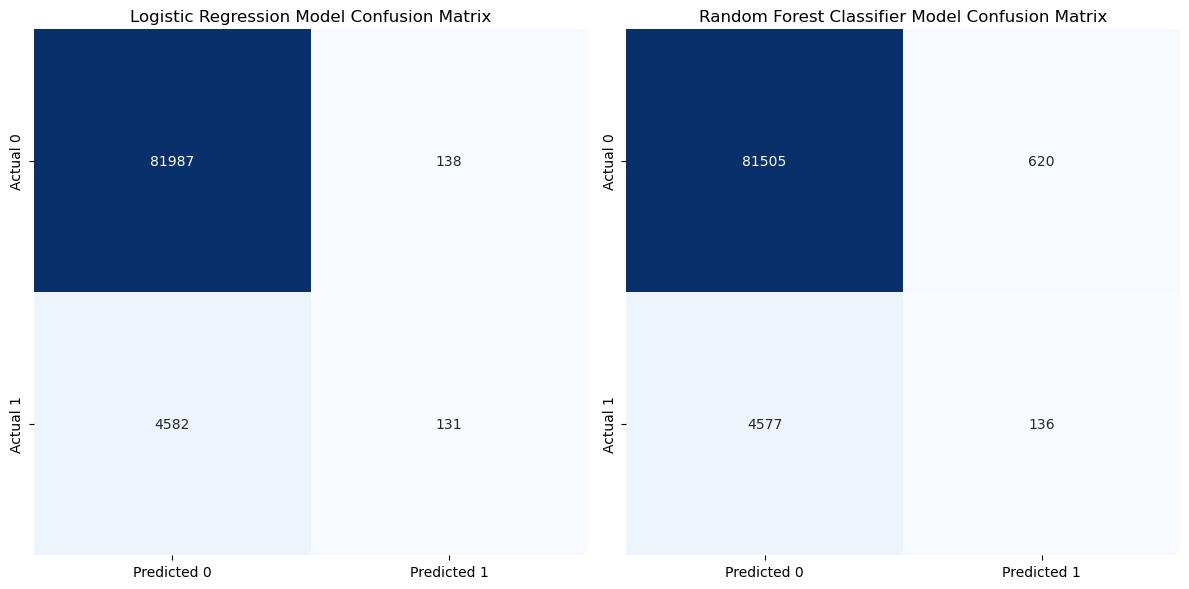

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrices
confusion_matrix_model1 = np.array([[81987, 138], [4582, 131]])
confusion_matrix_model2 = np.array([[81505, 620], [4577, 136]])

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_model1, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Model Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_model2, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Classifier Model Confusion Matrix')

plt.tight_layout()
plt.show()

In [40]:
import joblib
# Save the trained model to a pickle file
joblib.dump(random_forest, 'random_forest_model.pkl')
# Save the preprocessed data to a CSV file (optional)
heartdisease_df_encoded.to_csv('heart_disease_preprocessed_data.csv', index=False)